In [2]:
import json
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import requests
import datetime
import time
import os
import psycopg2
import pandas as pd
import urllib
from urllib.request import urlopen
import json
import csv
from io import StringIO
import urllib
from pprint import pprint
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 
import matplotlib.pyplot as plt

In [47]:
pip install shapely

     |████████████████████████████████| 1.4 MB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [3]:
df_taxi = pd.read_csv('Taxi_Trips_Nov2020.csv')

In [4]:
df_trans = pd.read_csv('Transportation_Network_Providers_-_Trips.csv')

In [5]:
df_ccvi = pd.read_csv('Chicago_COVID-19_Community_Vulnerability_Index__CCVI_.csv')

In [6]:
df_neigh = pd.read_csv('Neighborhoods_2012b.csv')

In [7]:
df_zp = pd.read_csv('COVID-19_by_ZIP_Code.csv')

In [39]:
df_comm = pd.read_csv('CommAreas.csv')

In [8]:
df_taxi.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'Community Areas'],
      dtype='object')

In [9]:
df_trans.columns

Index(['Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location'],
      dtype='object')

In [9]:
df_ccvi.columns

Index(['Geography Type', 'Community Area or ZIP Code', 'Community Area Name',
       'CCVI Score', 'CCVI Category', 'Rank - Socioeconomic Status',
       'Rank - Household Composition and Disability',
       'Rank - Adults with no PCP', 'Rank - Cumulative Mobility Ratio',
       'Rank - Frontline Essential Workers', 'Rank - Age 65+',
       'Rank - Comorbid Conditions', 'Rank - COVID-19 Incidence Rate',
       'Rank - COVID-19 Hospital Admission Rate',
       'Rank - COVID-19 Crude Mortality Rate', 'Location',
       'Boundaries - ZIP Codes', 'Community Areas', 'Zip Codes',
       'Census Tracts', 'Wards'],
      dtype='object')

In [211]:
df_zp.columns

Index(['ZIP Code', 'Week Number', 'Week Start', 'Week End', 'Cases - Weekly',
       'Cases - Cumulative', 'Case Rate - Weekly', 'Case Rate - Cumulative',
       'Tests - Weekly', 'Tests - Cumulative', 'Test Rate - Weekly',
       'Test Rate - Cumulative', 'Percent Tested Positive - Weekly',
       'Percent Tested Positive - Cumulative', 'Deaths - Weekly',
       'Deaths - Cumulative', 'Death Rate - Weekly', 'Death Rate - Cumulative',
       'Population', 'Row ID', 'ZIP Code Location'],
      dtype='object')

In [42]:
df_comm.the_geom[1]

'MULTIPOLYGON (((-87.59215283879394 41.81692934626684, -87.59230805083372 41.816932108949715, -87.59489183437287 41.81694066791237, -87.59526147172721 41.81694276479231, -87.5959594527106 41.8168331429737, -87.59607134489875 41.81683283210018, -87.59619240328064 41.816832922974854, -87.59624880538335 41.816832941881316, -87.59639985269634 41.816817102379815, -87.59646347090171 41.81690772840355, -87.59680432831736 41.81692681893991, -87.59688282030834 41.816927982205605, -87.5975100001849 41.816921048099, -87.59803783837589 41.81691521016886, -87.59819531200557 41.816913409064824, -87.59853718256805 41.81690951410914, -87.59888196739156 41.816904939175885, -87.59910936750536 41.816901921425945, -87.59941678055803 41.81689547206216, -87.59959063950275 41.81689182420462, -87.60003319187896 41.81688969056796, -87.60030287788608 41.816888193706355, -87.60063009747509 41.816883941061356, -87.60095720989756 41.81687968899616, -87.60119172213983 41.816877616431775, -87.60140216095583 41.81687

In [217]:
df_ccvi.head()

,Geography Type,Community Area or ZIP Code,Community Area Name,CCVI Score,CCVI Category,Rank - Socioeconomic Status,Rank - Household Composition and Disability,Rank - Adults with no PCP,Rank - Cumulative Mobility Ratio,Rank - Frontline Essential Workers,...,Rank - Comorbid Conditions,Rank - COVID-19 Incidence Rate,Rank - COVID-19 Hospital Admission Rate,Rank - COVID-19 Crude Mortality Rate,Location,Boundaries - ZIP Codes,Community Areas,Zip Codes,Census Tracts,Wards
0,CA,70,Ashburn,45.1,MEDIUM,34.0,32.0,28.0,45.0,48.0,...,33.0,59.0,66.0,39.0,POINT (-87.7083657043 41.7457577128),8.0,69.0,4300,199.0,30.0
1,ZIP,60625,NaN,25.5,LOW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-87.701816 41.971155),20.0,6.0,21849,620.0,24.0
2,CA,1,Rogers Park,30.9,LOW,32.0,16.0,38.0,22.0,71.0,...,50.0,35.0,35.0,14.0,POINT (-87.6701668569 42.0096228806),9.0,10.0,21853,49.0,5.0
3,ZIP,60612,NaN,31.7,MEDIUM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-87.687011 41.88004),28.0,29.0,21184,785.0,46.0
4,ZIP,60641,NaN,36.1,MEDIUM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-87.746791 41.946682),21.0,15.0,22618,139.0,21.0


In [44]:
df_zp_unique = df_zp[['ZIP Code', 'ZIP Code Location']].drop_duplicates().sort_values(by = ['ZIP Code'])
df_zp_unique

,ZIP Code,ZIP Code Location
32,60601,POINT (-87.622844 41.886262)
69,60602,POINT (-87.628309 41.883136)
0,60603,POINT (-87.625473 41.880112)
34,60604,POINT (-87.629029 41.878153)
201,60605,POINT (-87.623449 41.867824)
224,60606,POINT (-87.63676 41.882634)
250,60607,POINT (-87.652727 41.876104)
260,60608,POINT (-87.670366 41.849879)
535,60609,POINT (-87.653382 41.812017)
564,60610,POINT (-87.63581 41.90455)


In [31]:
df_neigh.head()

,the_geom,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60670812560372 41.81681377...,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157
1,MULTIPOLYGON (((-87.62760697485348 41.87437097...,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156
2,MULTIPOLYGON (((-87.66706868914602 41.88885187...,United Center,UNITED CENTER,3.252051e+07,23101.363745
3,MULTIPOLYGON (((-87.65833494805533 41.92166144...,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745
4,MULTIPOLYGON (((-87.74059567509266 41.88782316...,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351


In [15]:
df_merged = pd.concat([df_trans, df_taxi])

In [16]:
print(df_trans.shape)
print(df_taxi.shape)
print(df_merged.shape)

(1624619, 21)
(75262, 24)
(1699881, 29)


In [17]:
# Drop rows with NaN in Pickup location, Dropoff location, Pickup community area, Dropoff community area

df_merged.dropna(subset=['Pickup Community Area', 'Dropoff Community Area', 'Pickup Centroid Latitude', 'Dropoff Centroid Latitude'], inplace=True)

In [18]:
df_merged.columns

Index(['Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location', 'Taxi ID',
       'Tips', 'Tolls', 'Extras', 'Payment Type', 'Company',
       'Dropoff Centroid  Location', 'Community Areas'],
      dtype='object')

In [19]:
df_merged

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Dropoff Centroid Longitude,Dropoff Centroid Location,Taxi ID,Tips,Tolls,Extras,Payment Type,Company,Dropoff Centroid Location,Community Areas
0,0003bbcd934e38da460749062b7b58ba02529e81,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,779.0,4.40,NaN,NaN,35.0,41.0,10.00,...,-87.592311,POINT (-87.592310855 41.794090253),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000ad28aed5cdb660a1332ef0061d8782e23409c,11/01/2020 12:00:00 AM,11/01/2020 12:00:00 AM,448.0,1.40,1.703128e+10,1.703183e+10,28.0,28.0,7.50,...,-87.654093,POINT (-87.6540926517 41.8716894745),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001b36e51fec896fb5aef60741b1bcf27c8b4fb2,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,573.0,5.40,1.703132e+10,1.703106e+10,32.0,6.0,12.50,...,-87.638575,POINT (-87.6385749205 41.9383912577),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002c55b7ae1589b08ce275a1346a06378099a81f,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,1047.0,4.40,1.703184e+10,1.703106e+10,24.0,6.0,10.00,...,-87.661545,POINT (-87.6615450961 41.9452823311),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,003093710bb47cd0a3de34d98b97dfd3d22f9e3f,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,820.0,4.70,NaN,NaN,71.0,66.0,7.50,...,-87.695666,POINT (-87.695666342 41.7718485152),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75256,f17304cff1c0ec03a40968959ab4fefe95a71823,11/01/2020 12:00:00 AM,11/01/2020 12:00:00 AM,826.0,4.17,NaN,NaN,6.0,21.0,13.25,...,-87.711211,NaN,6bf28ce74fd9409f6e90444f26011a39fde5b4eeba19e2...,0.0,0.0,0.0,Cash,Flash Cab,POINT (-87.7112105933 41.9386661962),57.0
75258,deafa860ff5fa09afcaf4b9b3af6b9de5253bbee,11/01/2020 12:00:00 AM,11/01/2020 12:00:00 AM,273.0,0.82,NaN,NaN,3.0,3.0,5.25,...,-87.655879,NaN,4431324ba2eb43217ae08e112d9e05db41d7a588f0b5e4...,0.0,0.0,0.0,Cash,Flash Cab,POINT (-87.6558787862 41.96581197),31.0
75259,c63663f0bee34424638a7baf00f683a203800b24,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,1260.0,12.10,NaN,NaN,76.0,16.0,31.50,...,-87.723452,NaN,9a423881d4046f5590943c08ec5e58d59f5ebd91fe26aa...,0.0,0.0,4.0,Cash,"Taxicab Insurance Agency, LLC",POINT (-87.7234523905 41.9535821253),75.0
75260,bf81b830bedb676a9dbeed6fd4d322510bc32388,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,1380.0,17.00,NaN,NaN,76.0,8.0,42.75,...,-87.633308,NaN,4c8741fac63baa5f25f60596ae1905fb56201a21068bea...,0.0,0.0,5.0,Cash,Star North Management LLC,POINT (-87.6333080367 41.899602111),75.0


###  Requirement 3: 
#### Neighborhoods with High CCVI To track the number of taxi trips from/to the neighborhoods that have CCVI category with value HIGH
#### Using "community area" to replace "neighborhood"

In [12]:
# Find the areas with HIGH CCVI

df_high = df_ccvi[df_ccvi['CCVI Category'] == 'HIGH'][~df_ccvi['Community Area Name'].isna()].sort_values(by = ['Community Area or ZIP Code'])
df_high['Community Area or ZIP Code'].unique()

<ipython-input-12-4d59651a8fea>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_high = df_ccvi[df_ccvi['CCVI Category'] == 'HIGH'][~df_ccvi['Community Area Name'].isna()].sort_values(by = ['Community Area or ZIP Code'])


array([18, 19, 20, 23, 25, 27, 29, 30, 31, 37, 47, 49, 51, 53, 56, 57, 58,
       61, 62, 63, 65, 66, 67, 68, 71, 73])

### From

In [24]:
# Track the number of trips "from" the community areas with HIGH CCVI 
# Merge on "Pickup Community Area" from df_merged with "Community Areas" from df_ccvi

df_from = df_merged.merge(df_high, how='inner', left_on='Pickup Community Area', right_on='Community Area or ZIP Code') 

In [25]:
# Convert data types

df_from['Pickup Community Area'] = df_from['Pickup Community Area'].astype(int)

In [52]:
# Save this table to local

#df_from.to_csv('Trips_from_high_ccvi.csv')

In [26]:
df_from.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Rank - Comorbid Conditions,Rank - COVID-19 Incidence Rate,Rank - COVID-19 Hospital Admission Rate,Rank - COVID-19 Crude Mortality Rate,Location,Boundaries - ZIP Codes,Community Areas_y,Zip Codes,Census Tracts,Wards
0,003093710bb47cd0a3de34d98b97dfd3d22f9e3f,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,820.0,4.7,NaN,NaN,71,66.0,7.5,...,49.0,25.0,61.0,41.0,POINT (-87.6563059862 41.7442051463),59.0,70.0,21554,575.0,13.0
1,0aec4ee97ee8710bb136e8526fafd7eddcae861a,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,966.0,5.1,NaN,NaN,71,49.0,12.5,...,49.0,25.0,61.0,41.0,POINT (-87.6563059862 41.7442051463),59.0,70.0,21554,575.0,13.0
2,0f7f39761d0dfbdf65a8c7f2f223acbf0168c94b,11/01/2020 12:00:00 AM,11/01/2020 12:30:00 AM,1142.0,4.9,NaN,NaN,71,67.0,10.0,...,49.0,25.0,61.0,41.0,POINT (-87.6563059862 41.7442051463),59.0,70.0,21554,575.0,13.0
3,317d22ef4b7d0969780bf69498d93009d17ba82d,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,345.0,1.3,1.703171e+10,1.703169e+10,71,69.0,5.0,...,49.0,25.0,61.0,41.0,POINT (-87.6563059862 41.7442051463),59.0,70.0,21554,575.0,13.0
4,3fb78c919b18935af5b1907611b5491915896686,11/01/2020 12:00:00 AM,11/01/2020 12:15:00 AM,876.0,4.5,1.703171e+10,1.703183e+10,71,42.0,10.0,...,49.0,25.0,61.0,41.0,POINT (-87.6563059862 41.7442051463),59.0,70.0,21554,575.0,13.0


<AxesSubplot:ylabel='Pickup Community Area'>

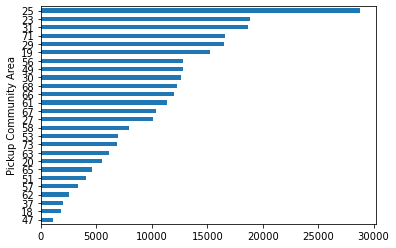

In [27]:
df_from.groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='barh')

### To

<AxesSubplot:ylabel='Dropoff Community Area'>

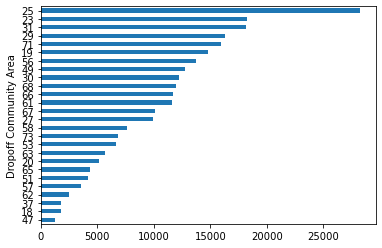

In [28]:
# Track the number of trips "from" the community areas with HIGH CCVI 
# Merge on "Pickup Community Area" from df_merged with "Community Areas" from df_ccvi

df_to = df_merged.merge(df_high, how='inner', left_on='Dropoff Community Area', right_on='Community Area or ZIP Code') 

# Convert data types

df_to['Dropoff Community Area'] = df_to['Dropoff Community Area'].astype(int)

# Count and plot
df_to.groupby(['Dropoff Community Area'])['Trip ID'].count().sort_values().plot(kind='barh')

###  Requirement 4: 
#### Daily/weekly/monthly Forecast of Taxi trips per zip code

#### !!! Need to do:
#### Map to multipolygon to find corresponding  community area
#### Aggregate and count the trips for each commnity area

In [175]:
#df_ccvi.columns

Index(['Geography Type', 'Community Area or ZIP Code', 'Community Area Name',
       'CCVI Score', 'CCVI Category', 'Rank - Socioeconomic Status',
       'Rank - Household Composition and Disability',
       'Rank - Adults with no PCP', 'Rank - Cumulative Mobility Ratio',
       'Rank - Frontline Essential Workers', 'Rank - Age 65+',
       'Rank - Comorbid Conditions', 'Rank - COVID-19 Incidence Rate',
       'Rank - COVID-19 Hospital Admission Rate',
       'Rank - COVID-19 Crude Mortality Rate', 'Location',
       'Boundaries - ZIP Codes', 'Community Areas', 'Zip Codes',
       'Census Tracts', 'Wards'],
      dtype='object')

In [63]:
# Create a new dataframe with only the columns we need

df_new = df_merged[['Trip ID', 'Trip Start Timestamp', 'Trip Seconds', 'Trip Miles', 'Pickup Community Area', 
                   'Dropoff Community Area', 'Fare', 'Tip', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Pickup Centroid Location',
     'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location']]

In [171]:
#df_zp = df_zp[df_zp['Week Start'] == '11/01/2020']

In [64]:
# Chop off to only get one week's data

df_new1 = df_new[df_new['Trip Start Timestamp'] <= '11/08/2020 12:00:00 AM']

In [86]:
df_new1.head()

,Trip ID,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0003bbcd934e38da460749062b7b58ba02529e81,11/01/2020 12:00:00 AM,779.0,4.4,35,41,10.0,1.0,False,1.0,41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),41.794090,-87.592311,POINT (-87.592310855 41.794090253)
1,000ad28aed5cdb660a1332ef0061d8782e23409c,11/01/2020 12:00:00 AM,448.0,1.4,28,28,7.5,0.0,False,1.0,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.871689,-87.654093,POINT (-87.6540926517 41.8716894745)
2,001b36e51fec896fb5aef60741b1bcf27c8b4fb2,11/01/2020 12:00:00 AM,573.0,5.4,32,6,12.5,3.0,False,1.0,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.938391,-87.638575,POINT (-87.6385749205 41.9383912577)
3,002c55b7ae1589b08ce275a1346a06378099a81f,11/01/2020 12:00:00 AM,1047.0,4.4,24,6,10.0,0.0,False,1.0,41.898306,-87.653614,POINT (-87.6536139825 41.8983058696),41.945282,-87.661545,POINT (-87.6615450961 41.9452823311)
4,003093710bb47cd0a3de34d98b97dfd3d22f9e3f,11/01/2020 12:00:00 AM,820.0,4.7,71,66,7.5,0.0,False,1.0,41.744205,-87.656306,POINT (-87.6563059862 41.7442051463),41.771849,-87.695666,POINT (-87.695666342 41.7718485152)


In [80]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    77 non-null     object 
 1   PERIMETER   77 non-null     int64  
 2   AREA        77 non-null     int64  
 3   COMAREA_    77 non-null     int64  
 4   COMAREA_ID  77 non-null     int64  
 5   AREA_NUMBE  77 non-null     int64  
 6   COMMUNITY   77 non-null     object 
 7   AREA_NUM_1  77 non-null     int64  
 8   SHAPE_AREA  77 non-null     float64
 9   SHAPE_LEN   77 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 6.1+ KB


In [66]:
# Convert float to int

df_new1['Pickup Community Area'] = df_new1['Pickup Community Area'].astype(int)
df_new1['Dropoff Community Area'] = df_new1['Dropoff Community Area'].astype(int)

<ipython-input-66-c2ae13ffe85b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Pickup Community Area'] = df_new1['Pickup Community Area'].astype(int)
<ipython-input-66-c2ae13ffe85b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Dropoff Community Area'] = df_new1['Dropoff Community Area'].astype(int)


In [84]:
df_comm.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


### Map with Multipolygon Community Area Boundaries

In [77]:
# Get lats_vect and lons_vect

lats_vect = df_new1['Pickup Centroid Latitude'].to_numpy()
lons_vect = df_new1['Pickup Centroid Longitude'].to_numpy()

###  The method of finding the corresponding community area needs to be tested and improved

In [85]:
# Check which community area each pickup centroid location belongs to

for i in len(df_new1['Pickup Centroid Latitude']):
    for j in len(df_comm['the_geom']):
        #lats_lons_vect = np.column_stack((lats_vect, lons_vect)) # Reshape coordinates
        polygon = df_comm['the_geom'][j] # for each polygon
        point = Point(df_new1['Pickup Centroid Latitude'][i], df_new1['Pickup Centroid Longitude'][i]) # for each point
        if polygon.contains(point) or point.within(polygon): # boolean result
            df_new1['Community Area Mapped'][i] = df_comm['AREA_NUMBE'][j]
        j+=1
    i+=1

TypeError: 'int' object is not iterable

In [ ]:
### to delete

In [202]:
# Merge to get zipcode

df_r4 = df_new1.merge(df_ccvi, how='inner', left_on='Pickup Community Area', right_on='Community Area or ZIP Code') 

In [204]:
df_r4['Pickup Community Area'].unique()

array([35, 28, 32, 24, 71,  7,  6,  8, 21, 25, 72,  5, 77,  1, 38, 22, 30,
       76, 27, 58,  3, 31, 41,  4, 11, 15, 53,  2, 29, 42, 66, 44, 33, 16,
       46, 18, 48, 45, 43, 73, 64, 68, 59, 61, 67, 39, 26, 23, 69, 56, 74,
       49, 14, 57, 40, 75, 12, 70, 10, 17, 65, 34, 19, 60, 20, 63, 51, 62,
       50, 13,  9, 36, 47, 37, 54, 52, 55])

In [205]:
df_r4_zp = df_r4[df_r4['Geography Type'] == 'ZIP']

In [210]:
df_r4[['Geography Type', 'Community Area or ZIP Code']]

,Geography Type,Community Area or ZIP Code
0,CA,35
1,CA,35
2,CA,35
3,CA,35
4,CA,35
...,...,...
769861,CA,55
769862,CA,55
769863,CA,55
769864,CA,55


In [ ]:
### to delete

<AxesSubplot:title={'center':'11/01/2020'}, xlabel='Pickup Community Area'>

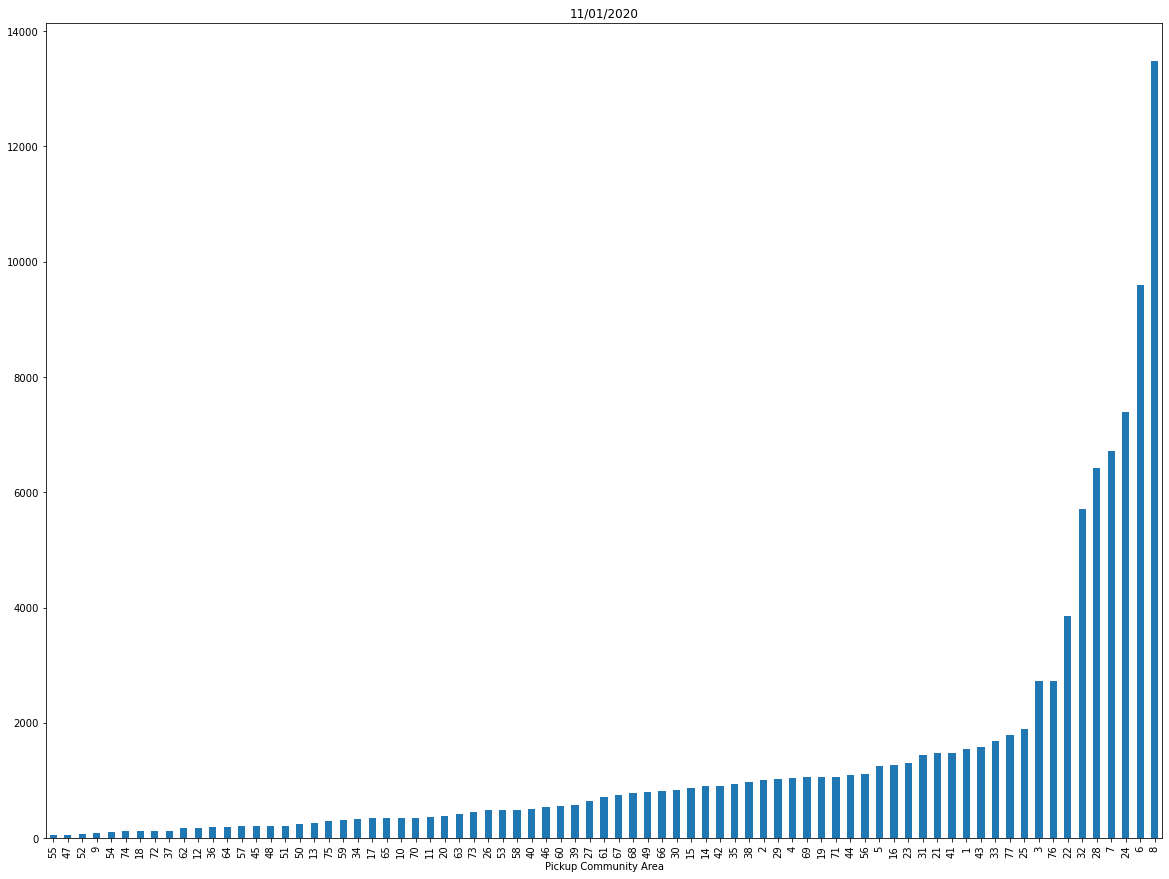

In [106]:
# Count and plot

df_new1[df_new1['Trip Start Timestamp'].str.contains('11/01/2020')].groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/01/2020', figsize=(20, 15))


<AxesSubplot:title={'center':'11/02/2020'}, xlabel='Pickup Community Area'>

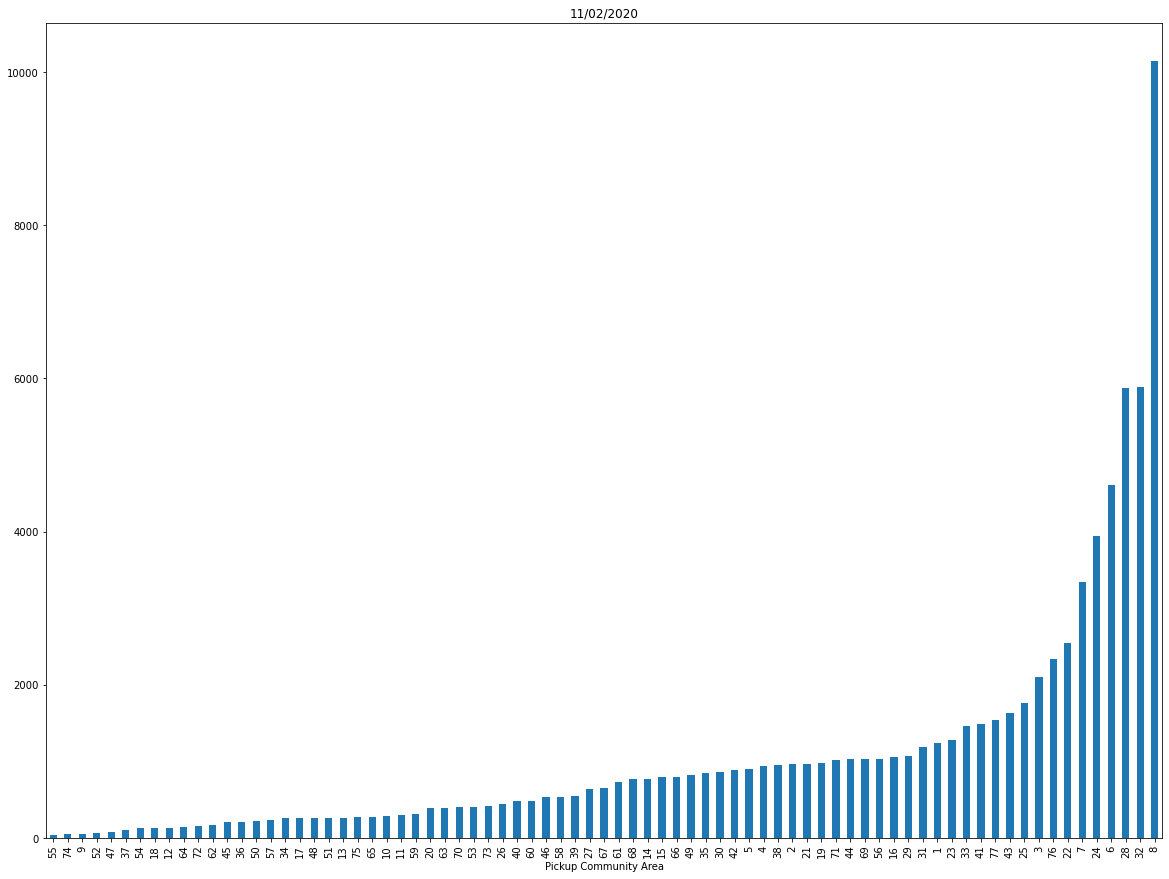

In [105]:
# Count and plot

df_new1[df_new1['Trip Start Timestamp'].str.contains('11/02/2020')].groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/02/2020', figsize=(20, 15))


<AxesSubplot:title={'center':'11/03/2020'}, xlabel='Pickup Community Area'>

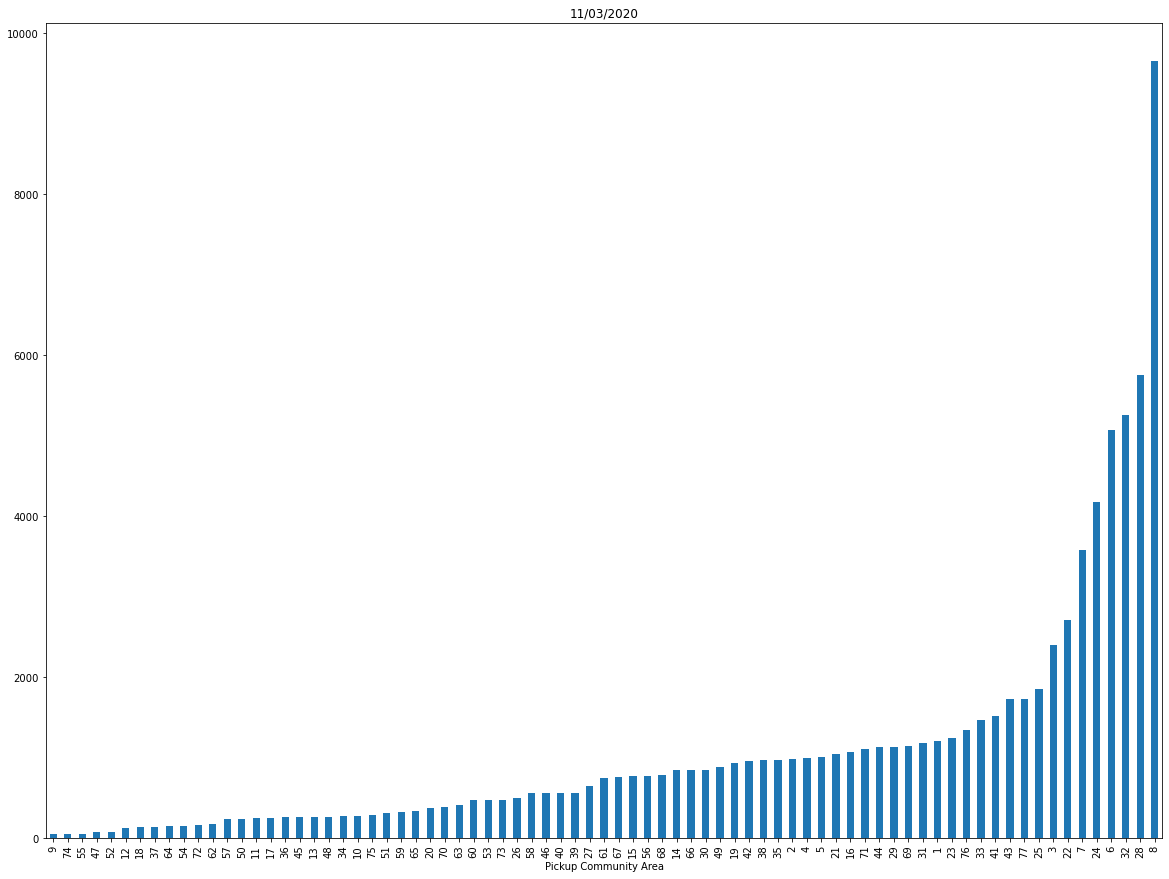

In [104]:
# Count and plot

df_new1[df_new1['Trip Start Timestamp'].str.contains('11/03/2020')].groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/03/2020', figsize=(20, 15))


<AxesSubplot:title={'center':'11/04/2020'}, xlabel='Pickup Community Area'>

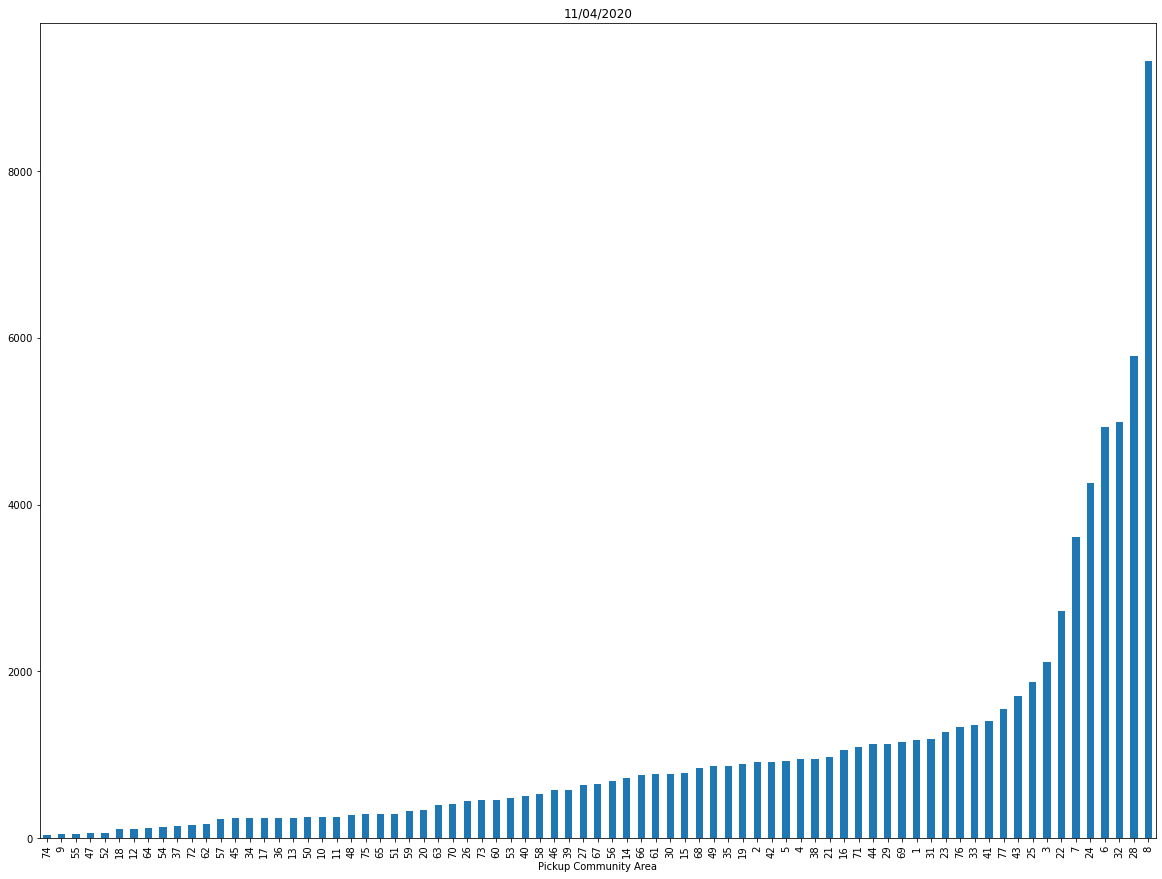

In [103]:
# Count and plot

df_new1[df_new1['Trip Start Timestamp'].str.contains('11/04/2020')].groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/04/2020', figsize=(20, 15))

<AxesSubplot:title={'center':'11/05/2020'}, xlabel='Pickup Community Area'>

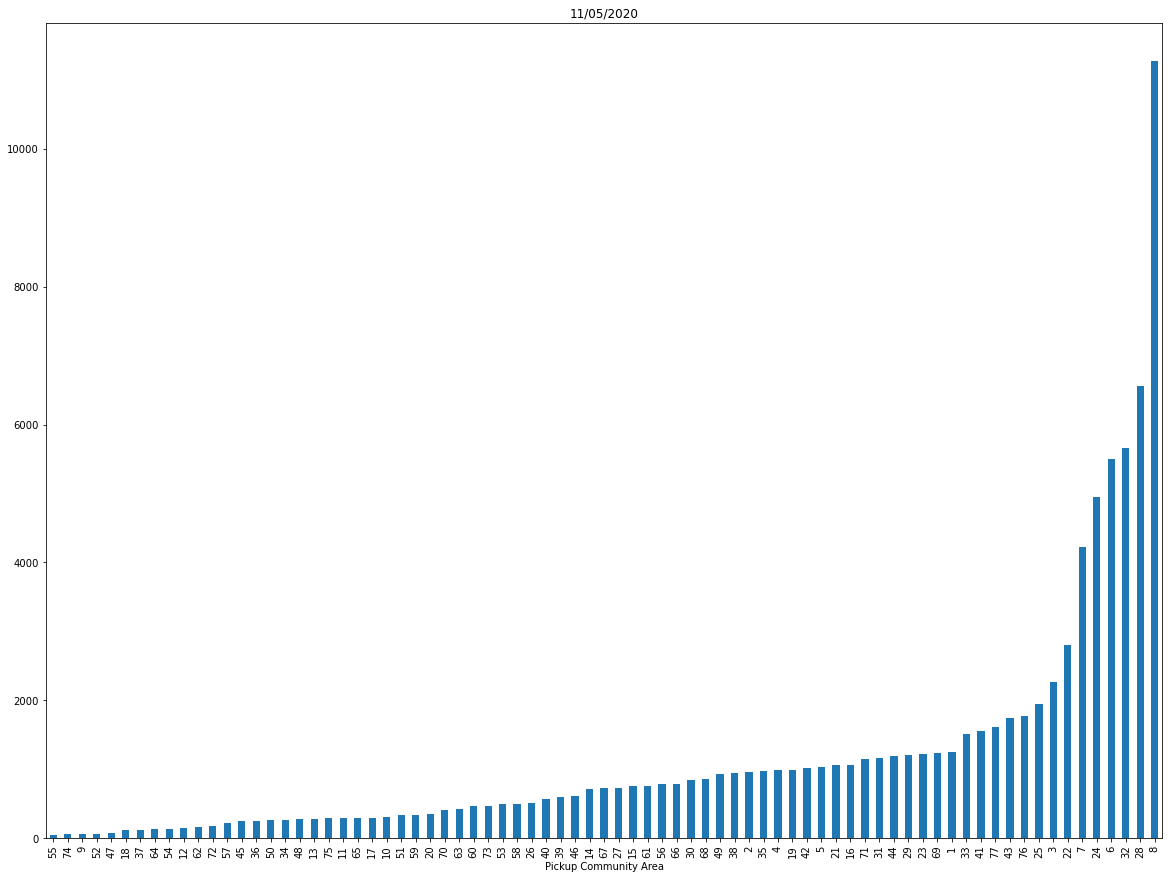

In [102]:
# Count and plot

df_new1[df_new1['Trip Start Timestamp'].str.contains('11/05/2020')].groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/05/2020', figsize=(20, 15))


<AxesSubplot:title={'center':'11/06/2020'}, xlabel='Pickup Community Area'>

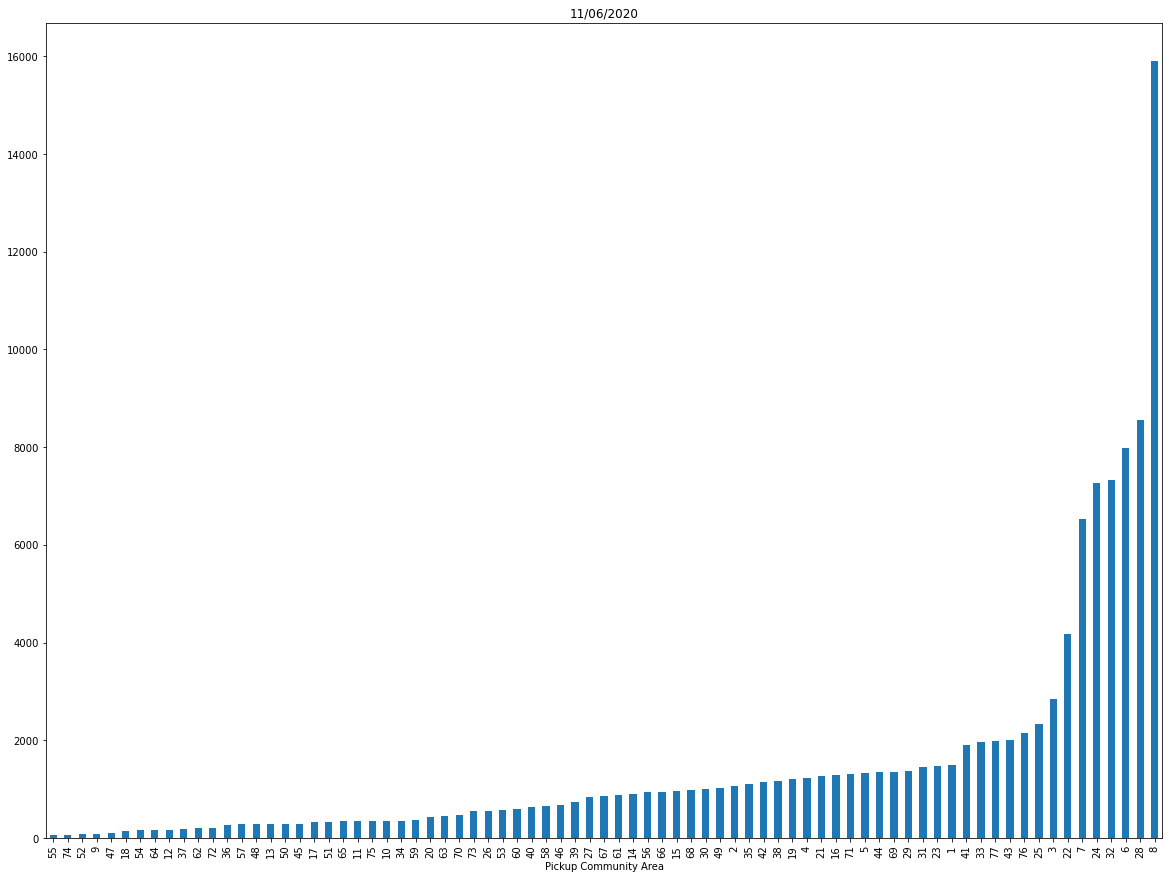

In [101]:
# Count and plot

df_new1[df_new1['Trip Start Timestamp'].str.contains('11/06/2020')].groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/06/2020', figsize=(20, 15))
                                                                                                                                             

<AxesSubplot:title={'center':'11/07/2020'}, xlabel='Pickup Community Area'>

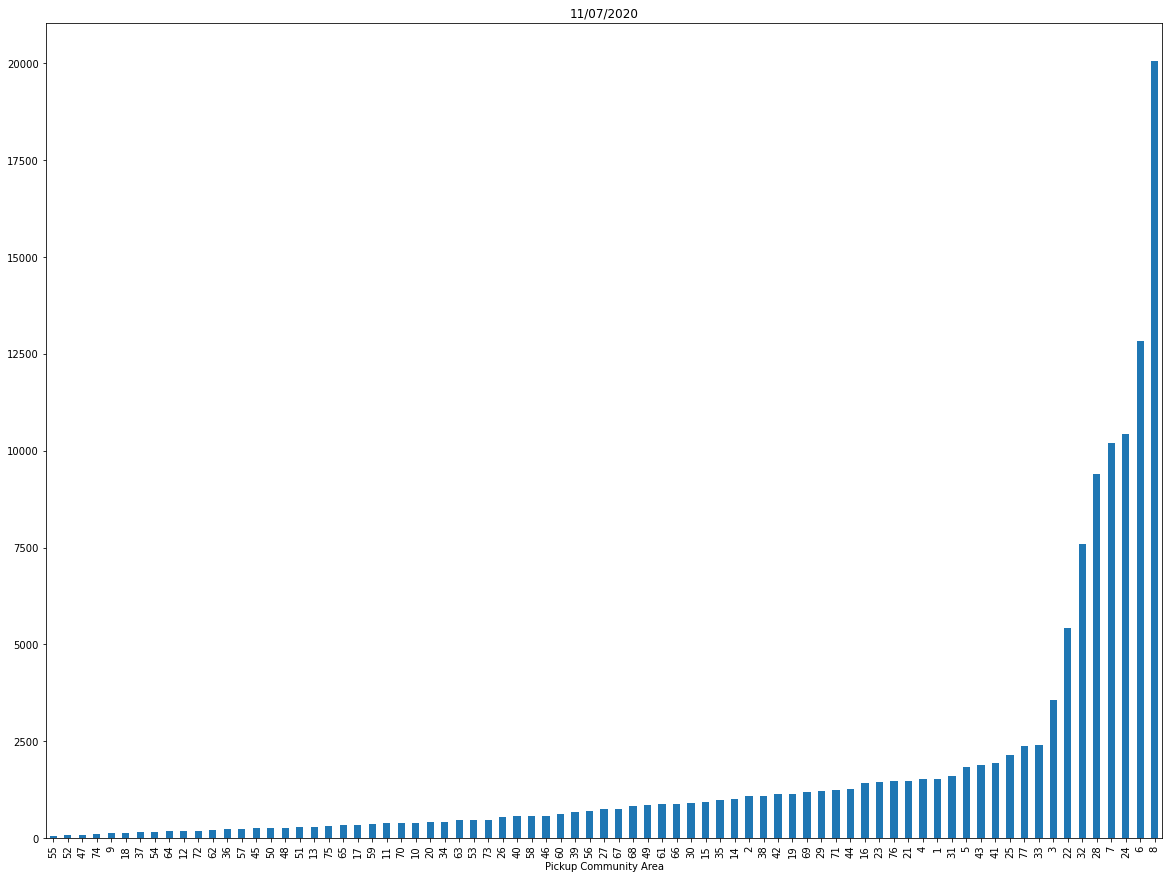

In [100]:
# Count and plot

df_new1[df_new1['Trip Start Timestamp'].str.contains('11/07/2020')].groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/07/2020', figsize=(20, 15))


### Weekly

In [109]:
# Chop off to only get weeks' data

df_new_wk1 = df_new[df_new['Trip Start Timestamp'] <= '11/08/2020 12:00:00 AM']
df_new_wk2 = df_new[(df_new['Trip Start Timestamp'] > '11/08/2020 12:00:00 AM')&(df_new['Trip Start Timestamp'] <= '11/15/2020 12:00:00 AM')]
df_new_wk3 = df_new[(df_new['Trip Start Timestamp'] > '11/15/2020 12:00:00 AM')&(df_new['Trip Start Timestamp'] <= '11/22/2020 12:00:00 AM')]
df_new_wk4 = df_new[(df_new['Trip Start Timestamp'] > '11/22/2020 12:00:00 AM')&(df_new['Trip Start Timestamp'] <= '11/29/2020 12:00:00 AM')]


<AxesSubplot:title={'center':'11/08/2020-11/14/2020'}, xlabel='Pickup Community Area'>

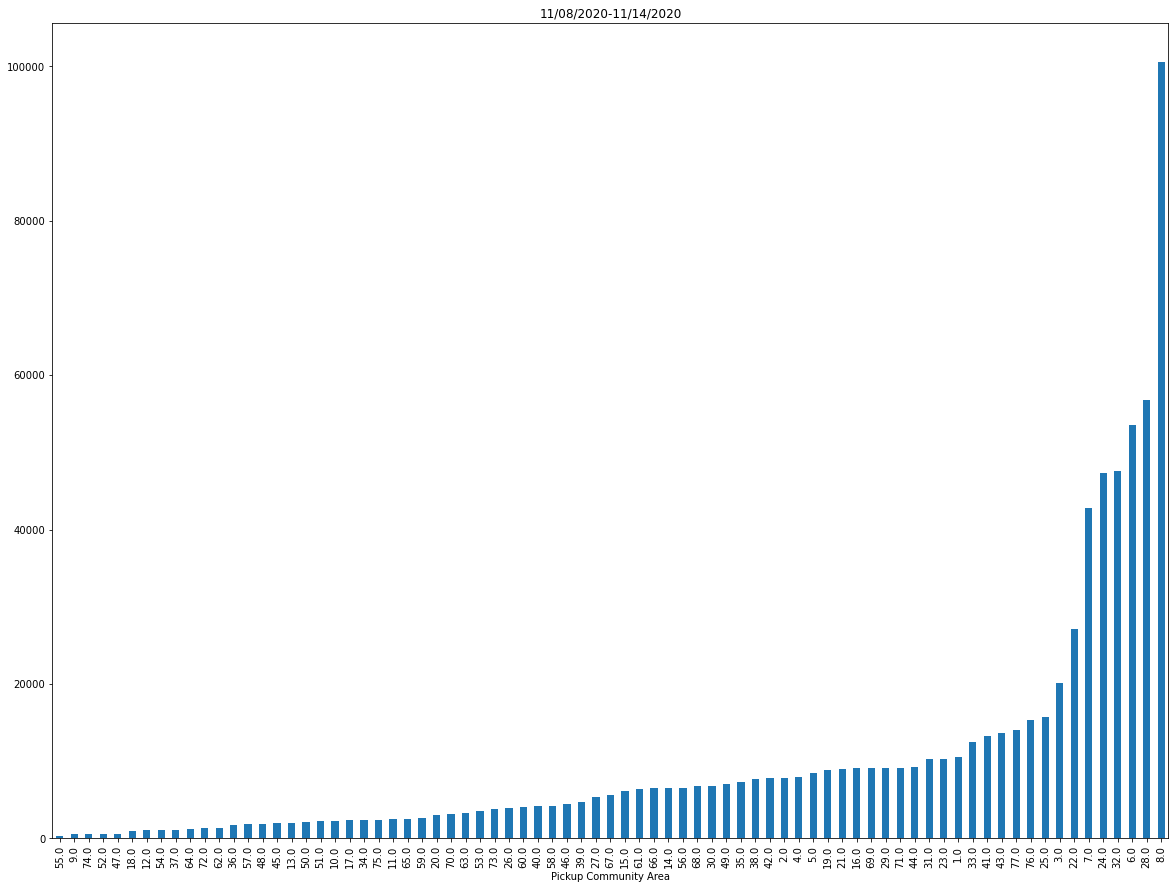

In [119]:
# Count and plot for 4 weeks

df_new_wk1.groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/01/2020-11/07/2020', figsize=(20, 15))
df_new_wk2.groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/08/2020-11/14/2020', figsize=(20, 15))
#df_new_wk3.groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/15/2020-11/21/2020', figsize=(20, 15))
#df_new_wk4.groupby(['Pickup Community Area'])['Trip ID'].count().sort_values().plot(kind='bar', title='11/22/2020-11/28/2020', figsize=(20, 15))



In [108]:
# Save this table to local

#df_new.to_csv('Trips_for_pred.csv')

In [126]:
#df_new1.to_csv('Trips_for_pred_1.csv')

In [118]:
# from datetime import datetime